In [21]:
import jax.numpy as jnp
import numpy as np
from jax import grad
import jax.random as random
from jax.scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Define a continuous function f: X x Y -> R that is concave-convex, i.e., f(., y) is concave for fixed y and f(x, .) is convex for fixed x. 

In [22]:
def concave_convex_fun(x, y):
    return (y-10)**2 - (x-5)**2

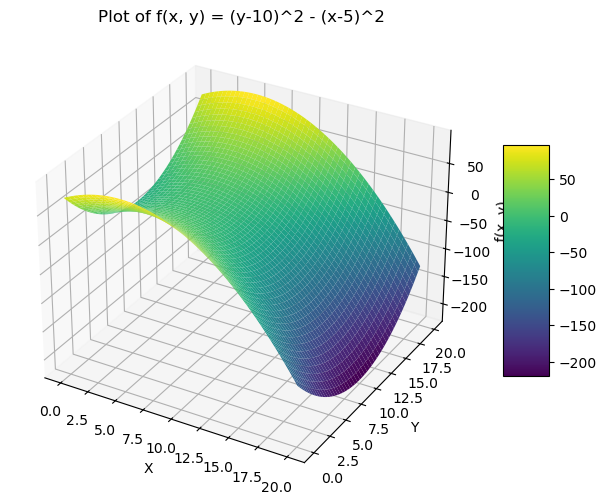

In [23]:
x = np.linspace(0, 20, 400)
y = np.linspace(0, 20, 400)
X, Y = np.meshgrid(x, y)

# Compute Z values for each (x, y)
Z = concave_convex_fun(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")

# Add labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x, y)")
ax.set_title("Plot of f(x, y) = (y-10)^2 - (x-5)^2")

# Add a color bar which maps values to colors
fig.colorbar(surface, shrink=0.5, aspect=5)

plt.show()

Find max_x min_y (fx,y)

In [24]:
def max_x_min_y(x0, y0, f, num_steps=100, learning_rate=0.01):
    x = x0
    y = y0
    obj_y = lambda y: f(x, y)
    grad_obj = grad(obj_y)
    for _ in range(num_steps):
        y -= learning_rate * grad_obj(y)
    obj_x = lambda x: -f(x, y)
    grad_obj = grad(obj_x)
    for _ in range(num_steps):
        x -= learning_rate * grad_obj(x)
    return -obj_x(x)

Find min_y max_x f(x, y)

In [25]:
def min_y_max_x(x0, y0, f, num_steps=100, learning_rate=0.01):
    x = x0
    y = y0
    obj_x = lambda x: -f(x, y)
    grad_obj = grad(obj_x)
    for _ in range(num_steps):
        x -= learning_rate * grad_obj(x)
    obj_y = lambda y: f(x, y)
    grad_obj = grad(obj_y)
    for _ in range(num_steps):
        y -= learning_rate * grad_obj(y)
    return obj_y(y)

In [26]:
key = random.PRNGKey(0)

x0 = random.uniform(key)
y0 = random.uniform(key)

LHS = max_x_min_y(x0, y0, concave_convex_fun)
RHS = min_y_max_x(x0, y0, concave_convex_fun)

print("LHS = ", LHS, "RHS = ", RHS)

LHS =  1.2455012 RHS =  1.2455012
